[{'symbol': 'AAPL', 'companyName': 'Apple Inc', 'marketCap': 2172892480000, 'sector': 'Technology', 'industry': 'Consumer Electronics', 'beta': 1.203743, 'price': 130.21, 'lastAnnualDividend': 1.04, 'volume': 101889137, 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'MSFT', 'companyName': 'Microsoft Corp', 'marketCap': 1901420220000, 'sector': 'Technology', 'industry': 'Software Infrastructure', 'beta': 0.787165, 'price': 252.46, 'lastAnnualDividend': 2.7, 'volume': 28393346, 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'NVDA', 'companyName': 'NVIDIA Corp', 'marketCap': 368756294000, 'sector': 'Technology', 'industry': 'Semiconductors', 'beta': 1.370588, 'price': 592.49, 'lastAnnualDividend': 0.64, 'volume': 8420595, 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'country': 'US', 'is

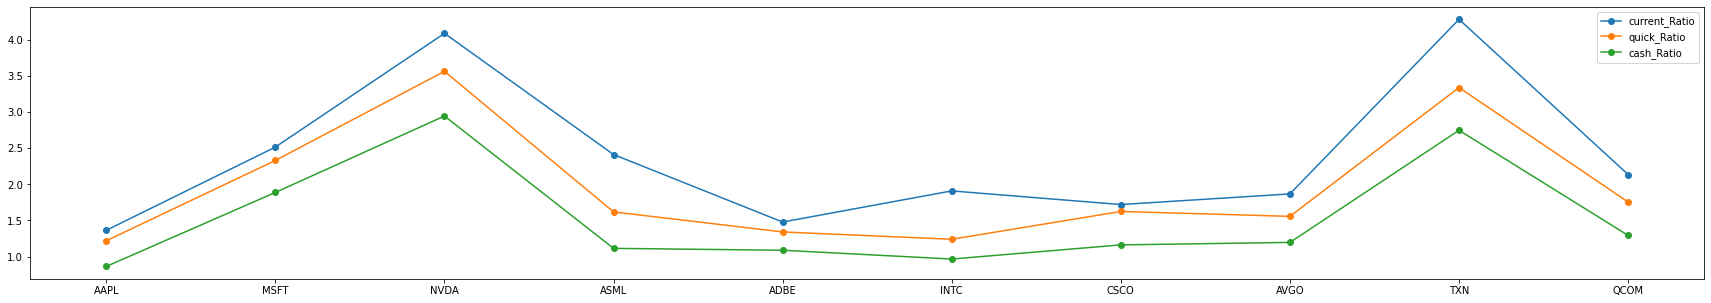

In [1]:
import requests
import pandas as pd
api_key = '08e2d2a138dba992cc772bd27479aade'
screener = requests.get(f'https://financialmodelingprep.com/api/v3/stock-screener?marketCapMoreThan=1000000000&sector=Technology&exchange=NASDAQ&limit=10&apikey={api_key}').json()

print(screener)

tickers = []
for item in screener:
  tickers.append(item['symbol'])

companies = {}
for ticker in tickers:
  BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?limit=1&apikey={api_key}').json()
  companies[ticker] = BS[0]

 
BS_industry = pd.DataFrame.from_dict(companies)
BS_industry = BS_industry.T

print(BS_industry['totalCurrentAssets'])
print(BS_industry['totalCurrentLiabilities'])

BS_industry['current_Ratio'] = BS_industry['totalCurrentAssets'] / BS_industry['totalCurrentLiabilities']

BS_industry['quick_Ratio'] = (BS_industry['cashAndCashEquivalents'] + BS_industry['shortTermInvestments'] +BS_industry['netReceivables']) / BS_industry['totalCurrentLiabilities']

BS_industry['cash_Ratio'] = (BS_industry['cashAndCashEquivalents'] + BS_industry['shortTermInvestments']) / BS_industry['totalCurrentLiabilities']
#cash ratio is the most liquid
import matplotlib.pyplot as plt

BS_industry[['current_Ratio','quick_Ratio','cash_Ratio']].plot(figsize=(30,5), marker = 'o')
#to have all xticks
plt.xticks(list(range(len(BS_industry.index))), BS_industry.index, fontsize = 10 )

plt.show()